### Results
In this section we are going to summarize and compare the models and strategies used above. Let’ start by taking a look to the accuracy results:

Model,Performance
Logistic,0.854730
KNN,0.726351
LDA,0.766892
QDA,0.405405
Decision Trees MaxDepth10,0.847973
Random Forest,0.888514
SVM,0.868243
SVM-GridOptimized,0.868243
Neural Network,0.858108
UMAP-Reduced SVM,0.712838


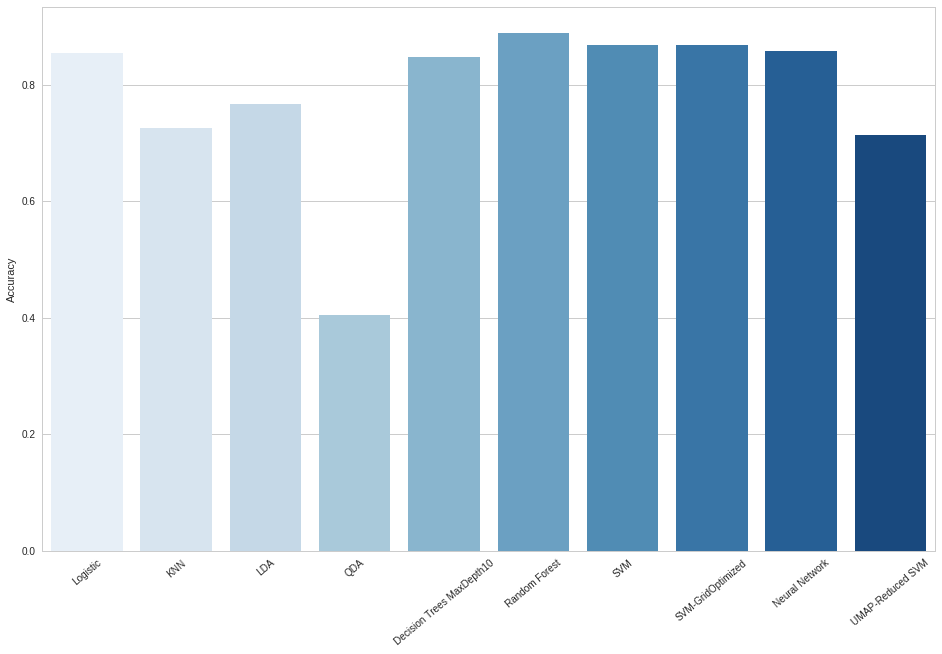

In [0]:
summary = pd.DataFrame({'Model':['Logistic','KNN','LDA','QDA',
                                 'Decision Trees MaxDepth10','Random Forest','SVM','SVM-GridOptimized', 'Neural Network','UMAP-Reduced SVM'],
                        'Performance':[logregcv_acc,knn_acc,LDA_acc,QDA_acc,clf10_acc,rf_model_acc,svc_acc,svc_grid_acc,NN_acc,UMAP_svc_acc]})

display(HTML(summary.to_html(index=False)))

fig, ax = plt.subplots(1, figsize=(16,10));
g=sns.barplot(x=summary['Model'],y=summary['Performance'],palette='Blues', ax=ax);
g.set(xlabel='', ylabel='Accuracy')
plt.xticks(rotation=40);

At first glance, we can see that QDA is at the bottom when it comes to performance and Random Forest performs best. However we have several models with similar performance including logistic regression which surprised us. This may mean that our data is linearly separable up to a certain limit which all of our models hit, then there is too complex an overlap for the models to further separate the categories. We would probably not recommend using  Decision Trees given their tendency to under or specially over fit on the training data.  Although this didn't happen in our specific test dataset, this model may perform more poorly on unseen data.  The ADNI dataset is still being collected and added to, so this is a consideration that must be made.

SVM performed fairly well on it's own, and optimizing the C parameter didn't help very much.  This may be due to the linearly-separable limit we discussed in the paragraph above.  The UMAP dimensionality-reduction technique did not help us overcome this limit in this case probably due to having an order of magnitude too few predictors.  It should definitely be kept in mind as the number of predictors grow.

Neural Networks could be also a good option for overcoming this limit our other models are hitting. In future work, if we dedicate more time exclusively to developing a better network for this specific data and try different combinations of regularization techniques such as drop out and early stopping, we may find that this allows us to gain even more predictive power. Given it’s robustness, ease of implementation and superior performance, we decided to stay with Random Forest as our final model. However, given we are dealing with a problem with medical applications, looking at basic accuracy may not be enough when people's health is on the line.  For a more detailed assessment of the models, we must look at the confusion matrices.

Model,False_Negatives
Logistic,9
KNN,8
LDA,8
QDA,160
Decision Trees MaxDepth10,15
Random Forest,8
SVM,10
SVM-GridOptimized,10
Neural Network,2
UMAP,5


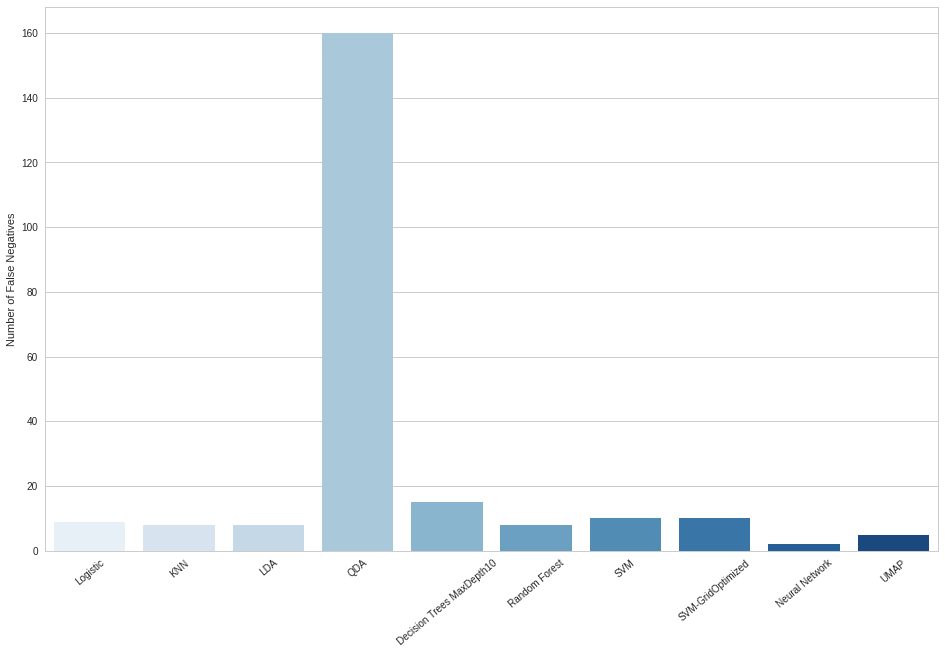

In [0]:
false_negs = pd.DataFrame({'Model':['Logistic','KNN','LDA','QDA',
                                 'Decision Trees MaxDepth10','Random Forest','SVM','SVM-GridOptimized', 'Neural Network','UMAP'],
                        'False_Negatives':[logregcv_conf[1,0]+logregcv_conf[2,0],knn_conf[1,0]+knn_conf[2,0],
                                           LDA_conf[1,0]+LDA_conf[2,0],QDA_conf[1,0]+QDA_conf[2,0],clf10_conf[1,0]+clf10_conf[2,0],
                                           rf_model_conf[1,0]+rf_model_conf[2,0],svc_conf[1,0]+svc_conf[2,0],
                                           svc_grid_conf[1,0]+svc_grid_conf[2,0],NN_conf[1,0]+NN_conf[2,0],
                                           UMAP_svc_conf[1,0]+UMAP_svc_conf[2,0]]})
false_negs=false_negs[['Model','False_Negatives']]
display(HTML(false_negs.to_html(index=False)))

fig, ax = plt.subplots(1, figsize=(16,10));
g=sns.barplot(x=false_negs['Model'],y=false_negs['False_Negatives'],palette='Blues', ax=ax);
g.set(xlabel='', ylabel='Number of False Negatives')
plt.xticks(rotation=40);


When considering a data science problem with health implications, it's very important to not only consider the accuracy of our models (as in how correct or incorrect they are at predicting outcomes) but also the ways in which the models guessed incorrectly.  For our purposes, misclassifications can be grouped into two main categories: false positives and false negatives.  False positives are when the model predicts the patient will develop the disease, but the patient turns out fine, and false negatives are when the model predicts the patient will be fine, and later develops the disease.  Since our data has 3 classes, (cognitively normal, mild cognitive impairment and dementia), we decided to count false negatives as the combination of predicted normal patients that were actually MCI or Dementia patients, and false positives as the opposite of this.  We feel that false negatives should be considered more important in evaluating models than false positives.  If the model is eventually be used in a clinical setting, the implications of a false negative is that the patient will most likely not seek additional screening or early treatment.  The disease would be allowed to continue on its course untreated until more severe symptoms emerge, which is unacceptable.  Having false positives is also undesirable since it can lead to additional unnecessary tests being run on the patient, as well as unnecessarily scaring the patient.  As data scientists and not hospital administrators, we will choose to favor patient health over costs of tests, but this balance must be considered each time a problem like this is approached.  

By looking at these false negatives, we can gain new insights into our models.  Random Forest was still one of the best in terms of false negatives, with a similar amount to most other models (Logistic, LDA, KNN).  Interestingly, Neural Networks had very few false negatives.  With further turning to boost accuracy a bit, this could easily become the best model we've tested for this data.  At this point, we'll consider it tied with Random Forest.  Another interesting point to note is that UMAP-reduction combined with SVM reduced the number of false negative predictions compared to SVM alone.  Although this resulted in lower accuracy as well, further tuning of this new and complex method could yield a superior model.


## Conclusions

In this project we have developed a model able to predict Alzheimer’s disease with a 87% accuracy based on a baseline set of tests and a second evaluation 12 months later. 

In order to get there we had to get familiar with a vast amount of data and many new concepts which was very time consuming. We started by attempting to obtain our own merged dataset because we believed on the one hand we would be more flexible, and on the other hand we would better understand the data we are working with. However, the size of the data, the variety of formats, and the level of time and understanding required made us go with the base ADNI merged data set. The time exploring the full dataset was not wasted since it provided us an understanding of the data we were dealing with and insight into how strenuous this process can be for some datasets. Even if all the data doesn't end up being actively used in a model, a thorough EDA is fundamentally a very important part of Data Science, if not the most important part.

After doing some standard preprocessing to the data we experimented with different classification models to explore their strengths, weaknesses and performance on our dataset. We also researched and included a new unsupervised dimensionality reduction and clustering technique called UMAP.  We concluded that either Random Forest or Neural Network would be the best model for predicting a correct diagnosis for patients.  Random Forest has a slight accuracy advantage over Neural Networks, but Neural Networks has fewer false negatives.



## Future Steps

There are many things that we would like to do in future studies. The first one that comes to our mind is getting a better understanding of predictive power of each predictor. We could focus on particular categories (neuropsychological tests vs biomarkers vs imaging) or on particular tests within those categories (CDR vs FAQ vs MOCA). The goal would be to provide with some recommendations on the most cost effective tests or group of tests to the doctors and community. The way we could approach this is by getting a temporary slice were we have a substantial number of patient observations with tests in all categories and flattening it. We could use the median for some of the repeated tests if any in that time range. That will allow us to then play with the data by adding/removing some predictors and  fitting some of the models we have seen perform better, for example random forests.

Once the predictors are covered, another dimension we would have liked to explore is the time. We would do this by researching and applying some time series analysis approaches since this data is inherently of that nature.

Revisiting the topic of false negatives, in future work we might want to pursue modifying our models’ decision boundaries to decrease the odds that an at-risk patient would be mis-predicted as not at risk for an AD diagnosis. By analyzing the ROC curves as the decision boundaries were varied, we’d be able to make an informed decision about the tradeoffs of different boundary values, as well as compare across models to find the one best suited to giving a low false negative rate without greatly sacrificing overall accuracy. Again, translating to the real world, this would mean a higher chance of being misdiagnosed as having a risk of AD, with the implication that further testing and plans of action would be prudent, but a decreased risk of missing the opportunity for an early diagnosis.

For last we would like to improve the preprocessing of the data and to better tune our models. For a dataset with so many missing values a wise selection of observations and predictors, and thorough imputation and preprocessing of the data is key for the accuracy of our models. We could try several imputation techniques like using random values or even predicting values by applying some simple models. Then when it comes to our models we feel we have a lot to tune and experiment with, specially we feel the neural networks have much more potential for this dataset that what we have seen.